In [7]:
# Read amz_uk_price_prediction_dataset.csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import math
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [8]:
# Create a crosstab between the product category and the isBestSeller status
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [9]:
# Convertir la columna 'isBestSeller' a booleano si es necesario
df['isBestSeller'] = df['isBestSeller'].astype(bool)

# Crear una tabla cruzada entre 'category' e 'isBestSeller'
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calcular la proporción de best-sellers por categoría
crosstab['BestSeller_Ratio'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Ordenar por la proporción de best-sellers en orden descendente
crosstab_sorted = crosstab.sort_values(by='BestSeller_Ratio', ascending=False)

# Mostrar los resultados
crosstab_sorted

isBestSeller,False,True,BestSeller_Ratio
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [10]:
# Conduct a Chi-square test
chi2, p, dof, ex = chi2_contingency(crosstab.iloc[:, :-1])

print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Compute Cramér's V
n = crosstab.sum().sum()
cramers_v = math.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

print(f"Cramér's V: {cramers_v}")

Chi-square test statistic: 36540.20270061387
P-value: 0.0
Degrees of freedom: 295
Cramér's V: 0.08646706664522864


In [ ]:
# Definir un umbral de outliers (percentil 95)
outlier_threshold = crosstab.max(axis=1).quantile(0.95)

# Filtrar las categorías con valores por debajo del umbral
filtered_crosstab = crosstab[crosstab.max(axis=1) < outlier_threshold]

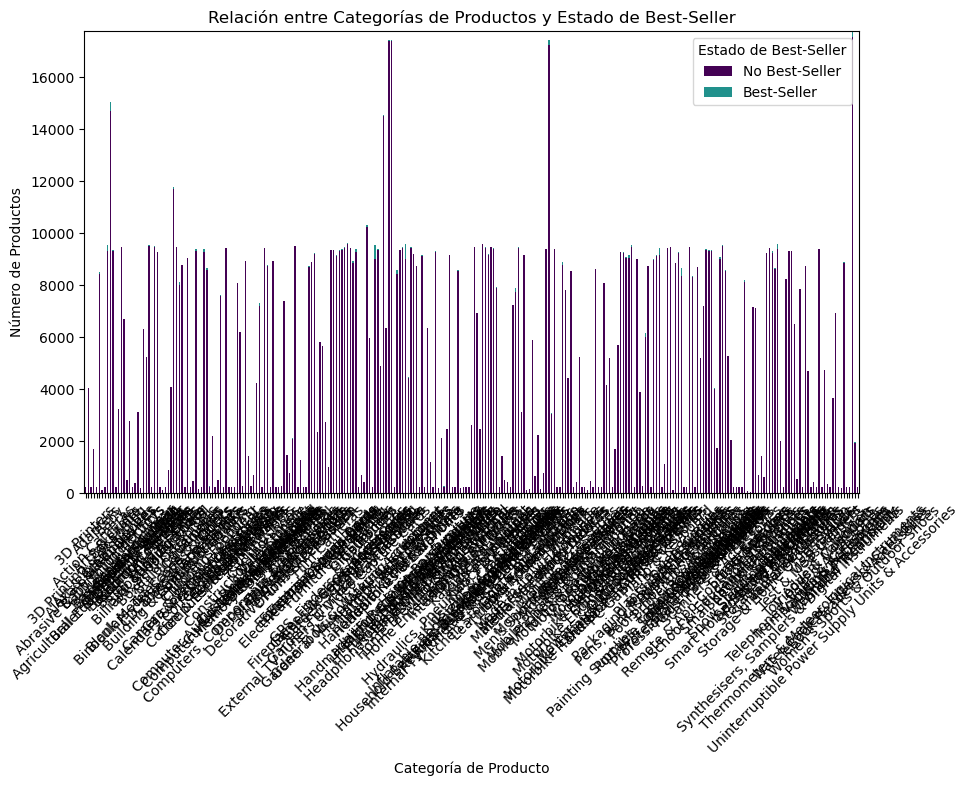

In [ ]:
# Graficar el gráfico de barras apiladas
filtered_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")

# Configurar etiquetas y título
plt.xlabel("Categoría de Producto")
plt.ylabel("Número de Productos")
plt.title("Relación entre Categorías de Productos y Estado de Best-Seller")
plt.xticks(rotation=45)
plt.legend(["No Best-Seller", "Best-Seller"], title="Estado de Best-Seller")

# Mostrar el gráfico
plt.show()